In [37]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [38]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(100,(3,3),strides=(1,1),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(3,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 98, 98, 100)       1000      
_________________________________________________________________
activation_15 (Activation)   (None, 98, 98, 100)       0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 49, 49, 100)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 47, 47, 100)       90100     
_________________________________________________________________
activation_16 (Activation)   (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 52900)            

In [40]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [41]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 2527 samples, validate on 632 samples
Epoch 1/20
2527/2527 [==============================] - 2s 899us/step - loss: 0.3211 - accuracy: 0.8742 - val_loss: 0.3055 - val_accuracy: 0.8418
Epoch 2/20
2527/2527 [==============================] - 2s 820us/step - loss: 0.2493 - accuracy: 0.8968 - val_loss: 0.2286 - val_accuracy: 0.8866
Epoch 3/20
2527/2527 [==============================] - 2s 816us/step - loss: 0.2061 - accuracy: 0.9152 - val_loss: 0.2314 - val_accuracy: 0.8935
Epoch 4/20
2527/2527 [==============================] - 2s 819us/step - loss: 0.1878 - accuracy: 0.9238 - val_loss: 0.1934 - val_accuracy: 0.9262
Epoch 5/20
2527/2527 [==============================] - 2s 826us/step - loss: 0.1580 - accuracy: 0.9371 - val_loss: 0.2153 - val_accuracy: 0.9182
Epoch 6/20
2527/2527 [==============================] - 2s 822us/step - loss: 0.1487 - accuracy: 0.9363 - val_loss: 0.2081 - val_accuracy: 0.9246
Epoch 7/20
2527/2527 [==============================] - 2s 824us/step - loss:

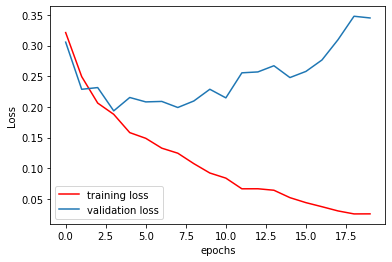

In [42]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

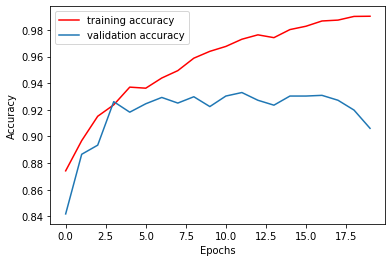

In [43]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
print(model.evaluate(test_data,test_target))

352/352 [==============================] - 0s 312us/step
[0.3854952644218098, 0.8920453786849976]


In [45]:
model.save('MASK_MODEL.h5')

In [46]:
#model = load_model('MASK_MODEL.h5')